In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import os
import seaborn as sns

In [2]:
# read in csv
read_file = os.path.join("Resources", "life_expectancy_data_region.csv")
life = pd.read_csv(read_file)
life

,Country,Year,Region,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Eastern Mediterranean,Developing,65.0,263.0,62,0.01,71.279624,65.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Eastern Mediterranean,Developing,59.9,271.0,64,0.01,73.523582,62.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Eastern Mediterranean,Developing,59.9,268.0,66,0.01,73.219243,64.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Eastern Mediterranean,Developing,59.5,272.0,69,0.01,78.184215,67.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Eastern Mediterranean,Developing,59.2,275.0,71,0.01,7.097109,68.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Africa,Developing,44.3,723.0,27,4.36,0.000000,68.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Africa,Developing,44.5,715.0,26,4.06,0.000000,7.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Africa,Developing,44.8,73.0,25,4.43,0.000000,73.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Africa,Developing,45.3,686.0,25,1.72,0.000000,76.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
# get index of df to easily select columns to filter and help with renaming
life.columns

Index(['Country', 'Year', 'Region', 'Status', 'Life expectancy ',
       'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
# trim dataset to focus on the impact Total Expenditure has on the Life Expectancy by country 
trim_df = life[['Region', 'Country', 'Year', 'Status', 'Life expectancy ',
              'Total expenditure']]
trim_df

,Region,Country,Year,Status,Life expectancy,Total expenditure
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [6]:
# rename columns
life_df = trim_df.rename(columns= {"Life expectancy ": "Life Expectancy (yrs)",
                                "Total expenditure": "Total Expenditure (%)",
                                  })
life_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [7]:
# get count for each column in the trimmed df
life_df.count()

Region                   2938
Country                  2938
Year                     2938
Status                   2938
Life Expectancy (yrs)    2928
Total Expenditure (%)    2712
dtype: int64

In [8]:
# remove rows with no Total Expenditure (%) informaiton
spending_df = life_df.dropna()
spending_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


In [9]:
# separate global data into developed vs developing nations
dev_df = spending_df.loc[spending_df["Status"] == "Developed"]
dev_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
113,Western Pacific,Australia,2014,Developed,82.7,9.42
114,Western Pacific,Australia,2013,Developed,82.5,9.36
115,Western Pacific,Australia,2012,Developed,82.3,9.36
116,Western Pacific,Australia,2011,Developed,82.0,9.20
117,Western Pacific,Australia,2010,Developed,81.9,9.20
...,...,...,...,...,...,...
2805,Americas,United States of America,2004,Developed,77.5,15.14
2806,Americas,United States of America,2003,Developed,77.2,15.60
2807,Americas,United States of America,2002,Developed,77.0,14.55
2808,Americas,United States of America,2001,Developed,76.9,13.73


In [10]:
undev_df = spending_df.loc[spending_df["Status"] == "Developing"]
undev_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
0,Eastern Mediterranean,Afghanistan,2015,Developing,65.0,8.16
1,Eastern Mediterranean,Afghanistan,2014,Developing,59.9,8.18
2,Eastern Mediterranean,Afghanistan,2013,Developing,59.9,8.13
3,Eastern Mediterranean,Afghanistan,2012,Developing,59.5,8.52
4,Eastern Mediterranean,Afghanistan,2011,Developing,59.2,7.87
...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,7.13
2934,Africa,Zimbabwe,2003,Developing,44.5,6.52
2935,Africa,Zimbabwe,2002,Developing,44.8,6.53
2936,Africa,Zimbabwe,2001,Developing,45.3,6.16


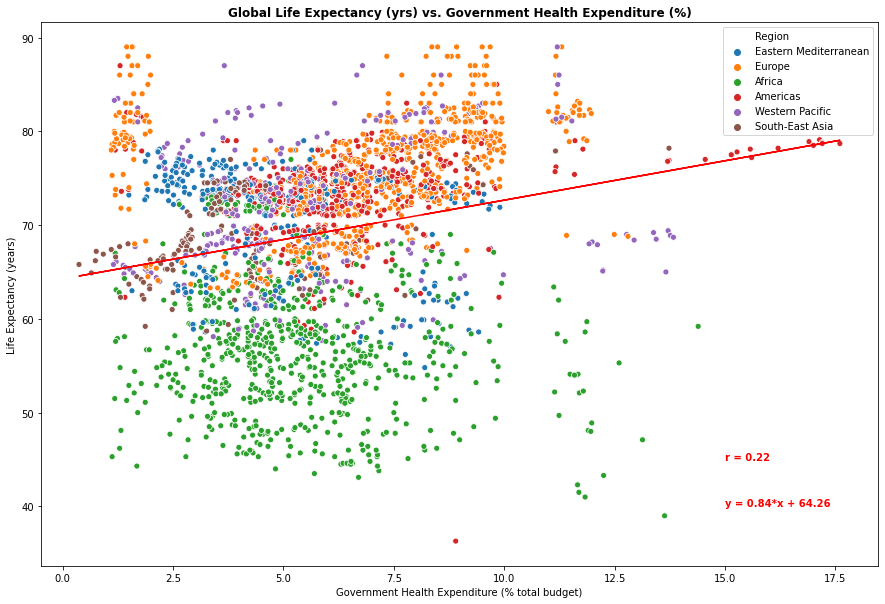

In [33]:
# plot global life expectancy vs health expenditure
plt.figure(figsize = (15,10))
sns.scatterplot(data=spending_df, x="Total Expenditure (%)", y="Life Expectancy (yrs)", hue="Region")
plt.title("Global Life Expectancy (yrs) vs. Government Health Expenditure (%)", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

# perform regression on global life expectancy vs health expenditure
(slope, intercept, rvalue, pvalue, stderr) = linregress(spending_df["Total Expenditure (%)"],spending_df["Life Expectancy (yrs)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (spending_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(spending_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(15,40),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (15, 45), color="red", fontweight = "bold")

plt.savefig("Images/GlobalExpenditure.png")
plt.show()

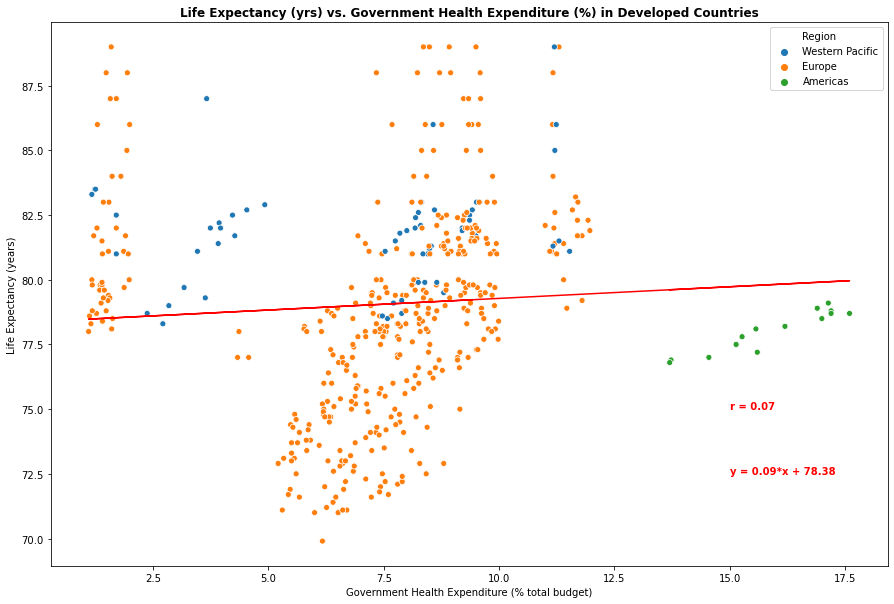

In [32]:
# plot life expectancy vs health expenditure in developed nations
plt.figure(figsize = (15,10))
sns.scatterplot(data=dev_df, x="Total Expenditure (%)", y="Life Expectancy (yrs)", hue="Region")
plt.title("Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developed Countries", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

# perform regression on life expectancy vs health expenditure in developed nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(dev_df["Total Expenditure (%)"],dev_df["Life Expectancy (yrs)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (dev_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(dev_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(15,72.5),color="red", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (15, 75), color="red", fontweight = "bold")

plt.savefig("Images/DevelopedNations.png")
plt.show()

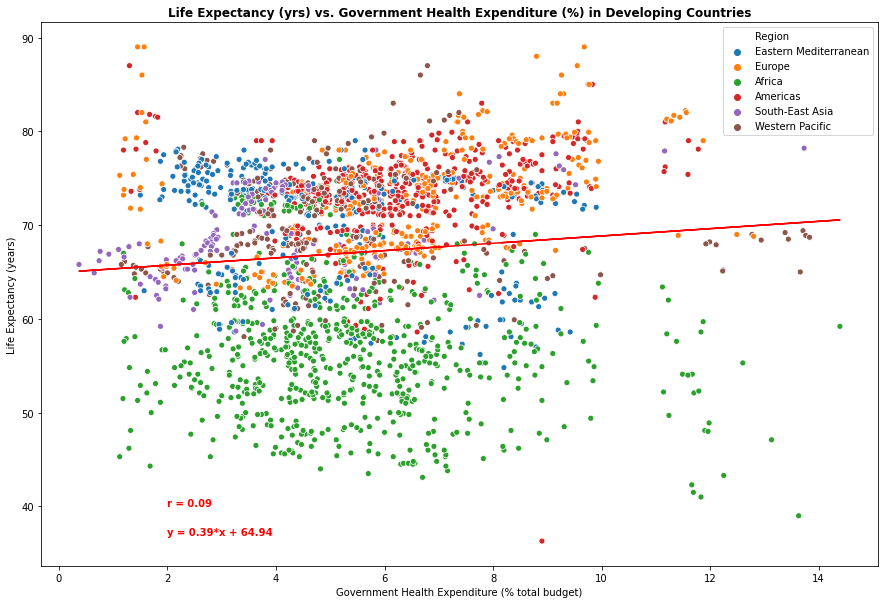

In [35]:
# plot life expectancy vs health expenditure in developing nations
plt.figure(figsize = (15,10))
sns.scatterplot(data=undev_df, x="Total Expenditure (%)", y="Life Expectancy (yrs)", hue="Region")
plt.title("Life Expectancy (yrs) vs. Government Health Expenditure (%) in Developing Countries", fontweight="bold")
plt.xlabel("Government Health Expenditure (% total budget)")
plt.ylabel("Life Expectancy (years)")

# perform regression on life expectancy vs health expenditure in developing nations
(slope, intercept, rvalue, pvalue, stderr) = linregress(undev_df["Total Expenditure (%)"],undev_df["Life Expectancy (yrs)"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (undev_df["Total Expenditure (%)"]* slope) + intercept
plt.plot(undev_df["Total Expenditure (%)"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq,(2,37),color="red",  fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (2,40), color="red", fontweight = "bold")

plt.savefig("Images/DevelopingNations.png")
plt.show()

In [36]:
# look at one developing nation through the years
malawi_df = undev_df.loc[undev_df["Country"] == "Malawi"]
malawi_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
1571,Africa,Malawi,2014,Developing,57.6,11.38
1572,Africa,Malawi,2013,Developing,56.7,1.96
1573,Africa,Malawi,2012,Developing,55.3,12.60
1574,Africa,Malawi,2011,Developing,54.1,11.67
1575,Africa,Malawi,2010,Developing,52.9,1.50
1576,Africa,Malawi,2009,Developing,51.5,1.18
1577,Africa,Malawi,2008,Developing,50.0,1.70
1578,Africa,Malawi,2007,Developing,48.5,9.31
1579,Africa,Malawi,2006,Developing,47.1,8.99
1580,Africa,Malawi,2005,Developing,46.0,8.20


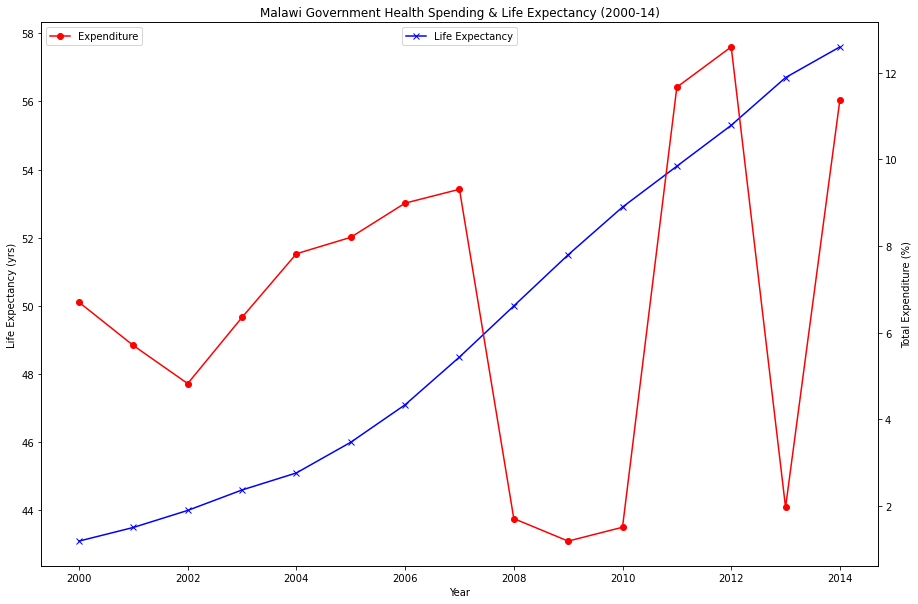

In [39]:
# plot gov expenditure and life expectancy over the years for Malawi (developing country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(malawi_df["Year"], malawi_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(malawi_df["Year"], malawi_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Malawi Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

#save fig and display fig
plt.savefig("Images/MalawiExpenditure.png")
plt.show()


In [41]:
# look at one developing nation through the years
sweden_df = dev_df.loc[dev_df["Country"] == "Sweden"]
sweden_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
2506,Europe,Sweden,2014,Developed,82.3,11.93
2507,Europe,Sweden,2013,Developed,81.9,11.97
2508,Europe,Sweden,2012,Developed,81.7,11.80
2509,Europe,Sweden,2011,Developed,81.7,11.70
2510,Europe,Sweden,2010,Developed,81.5,9.47
2511,Europe,Sweden,2009,Developed,81.4,9.94
2512,Europe,Sweden,2008,Developed,81.1,9.23
2513,Europe,Sweden,2007,Developed,89.0,8.92
2514,Europe,Sweden,2006,Developed,88.0,8.95
2515,Europe,Sweden,2005,Developed,85.0,9.60


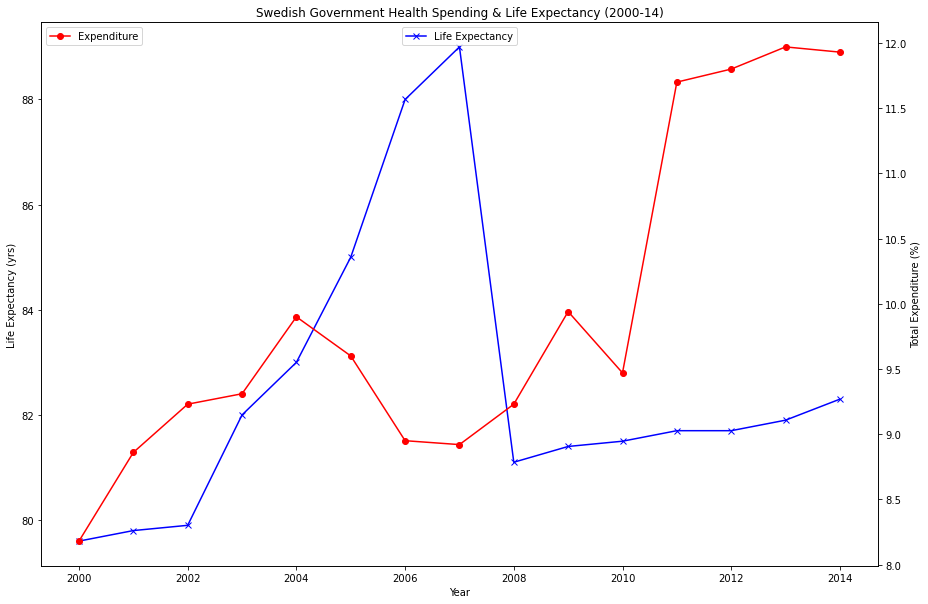

In [42]:
# plot gov expenditure and life expectancy over the years for Sweden (developed country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(sweden_df["Year"], sweden_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(sweden_df["Year"], sweden_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("Swedish Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

#save fig and display fig
plt.savefig("Images/SwedenExpenditure.png")
plt.show()


In [43]:
# just for fun, compare with USA
USA_df = dev_df.loc[dev_df["Country"] == "United States of America"]
USA_df

,Region,Country,Year,Status,Life Expectancy (yrs),Total Expenditure (%)
2795,Americas,United States of America,2014,Developed,79.1,17.14
2796,Americas,United States of America,2013,Developed,78.9,16.90
2797,Americas,United States of America,2012,Developed,78.8,17.20
2798,Americas,United States of America,2011,Developed,78.7,17.60
2799,Americas,United States of America,2010,Developed,78.7,17.20
2800,Americas,United States of America,2009,Developed,78.5,17.00
2801,Americas,United States of America,2008,Developed,78.2,16.20
2802,Americas,United States of America,2007,Developed,78.1,15.57
2803,Americas,United States of America,2006,Developed,77.8,15.27
2804,Americas,United States of America,2005,Developed,77.5,15.15


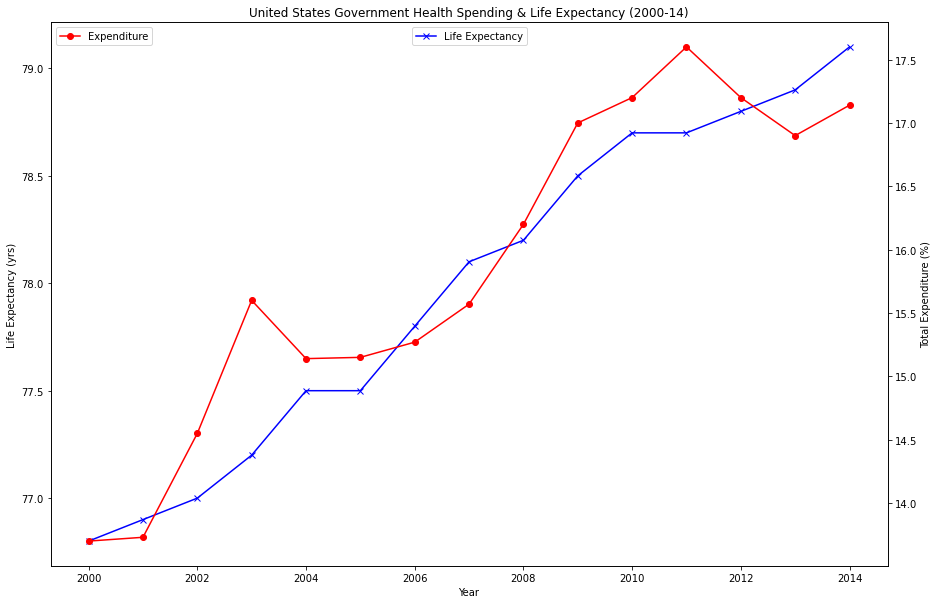

In [44]:
# plot gov expenditure and life expectancy over the years for Sweden (developed country)
fig, ax = plt.subplots(figsize =(15,10))

# twin object for dual y-axes on the same plot 
ax2 = ax.twinx()

# plot first y axis
line1 = ax.plot(USA_df["Year"], USA_df["Life Expectancy (yrs)"], color = "blue", marker = "x", label = "Life Expectancy")

#set x axis label
ax.set_xlabel("Year")
# set first y axis label 
ax.set_ylabel("Life Expectancy (yrs)")

# plot second y axis
line2 = ax2.plot(USA_df["Year"], USA_df["Total Expenditure (%)"], color = "red", marker = "o", label="Expenditure")
# set second y axis label
ax2.set_ylabel("Total Expenditure (%)")

ax.set_title("United States Government Health Spending & Life Expectancy (2000-14)")

ax.legend(loc = "upper center")
ax2.legend(loc = "upper left")

#save fig and display fig
plt.savefig("Images/USAExpenditure.png")
plt.show()
